In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_excel("C:/Users/monts/OneDrive/Escritorio/UAA/Inteligencia Artificial/VIH/dataset_VIH.xlsx")

# Handle missing values
df.fillna(0, inplace=True)

# Drop the last column (sumatoria)
df.drop(df.columns[-1], axis=1, inplace=True)

# Normalize the features
features = df.columns[1:-1]  # Exclude the first column (amino acid) and last column (classification)

# Convert data types and handle non-numeric values
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(0, inplace=True)

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Prepare features and target variable
def target_value(x):
    if isinstance(x, str):
        return 1 if x.strip() == 'R5X4' else 0
    return 0

X = df[features]  # Features
y = df['clase'].apply(target_value)  # Apply target value transformation

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Model Training

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Making Predictions

# Example of predicting a new amino acid
test = []

# HIV dummies (remove the last column to match the training data)
new_amino_acids = [[31.432432,0,3.603604,8.108108,57.657658,14.414414,44.144144,0.900901,152.252252,109.009009,22.522523,3.603604,90.09009,0,8.108108,8.108108,44.144144,72.972973,44.144144,0,57.657658,0.900901,0,0.900901,0], 
                   [235.739232,0,67.054715,91.268917,246.332945,78.696158,419.091967,16.763679,522.5844,215.250291,881.140862,33.643772,419.091967,0,119.208382,225.378347,268.218859,291.036088,491.85099,0,339.464494,97.90454,0,56.344587,0],
                   [235.739232,0,67.054715,91.268917,246.332945,78.696158,419.091967,16.763679,522.5844,215.250291,881.140862,33.643772,419.091967,0,119.208382,225.378347,268.218859,291.036088,491.85099,0,339.464494,97.90454,0,56.344587,0],
                   [260.802834,0,57.142857,99.291617,283.471074,62.455726,439.31523,17.001181,562.101535,218.299882,793.860685,26.564345,397.16647,0,106.257379,198.465171,283.471074,331.641086,410.979929,0,370.247934,99.291617,0,47.225502,0],
                   [32.432432,0,3.603604,8.108108,57.657658,14.414414,44.144144,0.900901,152.252252,109.009009,22.522523,3.603604,90.09009,0,8.108108,8.108108,44.144144,72.972973,44.144144,0,57.657658,0.900901,0,0.900901,0], 
                   [268.844807,0,51.458576,91.481914,268.844807,72.928821,434.189032,22.870478,477.946324,215.752625,863.010502,29.871645,492.998833,0,85.064177,215.752625,340.256709,236.289382,434.189032,0,406.184364,98.133022,0,46.674446,0]]

# Ensure new data has the right number of features
new_amino_acids_df = pd.DataFrame(new_amino_acids, columns=features)

new_amino_acid_scaled = scaler.transform(new_amino_acids_df)

# Predict using the trained model
prediction = model.predict(new_amino_acid_scaled)

for i, a in enumerate(new_amino_acids):
    print(f"\nAmino acid: {a}")
    if prediction[i] == 1:
        print("\tThe amino acid is HIV positive.")
    else:
        print("\tThe amino acid is not HIV positive.")

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.92      0.92      0.92        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48


Amino acid: [31.432432, 0, 3.603604, 8.108108, 57.657658, 14.414414, 44.144144, 0.900901, 152.252252, 109.009009, 22.522523, 3.603604, 90.09009, 0, 8.108108, 8.108108, 44.144144, 72.972973, 44.144144, 0, 57.657658, 0.900901, 0, 0.900901, 0]
	The amino acid is not HIV positive.

Amino acid: [235.739232, 0, 67.054715, 91.268917, 246.332945, 78.696158, 419.091967, 16.763679, 522.5844, 215.250291, 881.140862, 33.643772, 419.091967, 0, 119.208382, 225.378347, 268.218859, 291.036088, 491.85099, 0, 339.464494, 97.90454, 0, 56.344587, 0]
	The amino acid is not HIV positive.

Amino acid: [235.739232, 0, 67.054715, 91.268917, 246.332945, 78.696158, 419.091967, 16.763679, 52

c:\Users\monts\OneDrive\Escritorio\UAA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


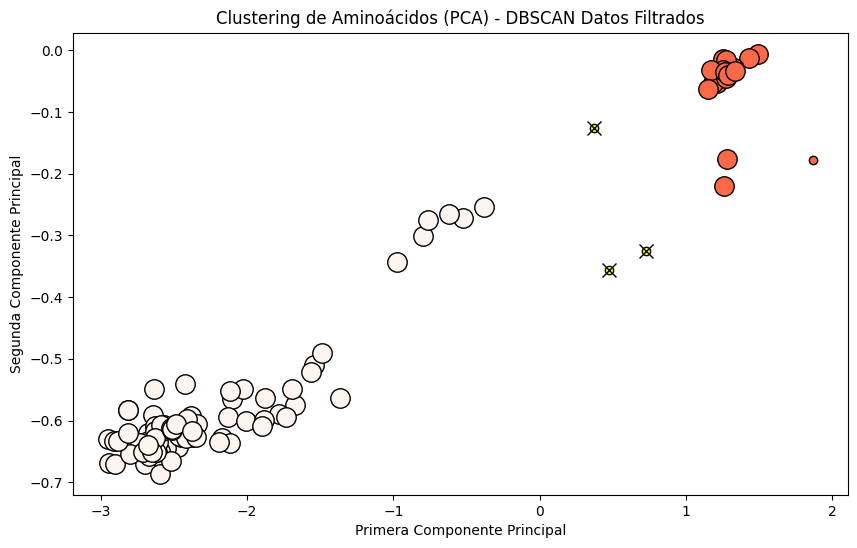


Distribución de Clusters en Datos Filtrados con DBSCAN:
Cluster -1: 3 muestras
Cluster 0: 81 muestras
Cluster 1: 19 muestras

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.92      0.92      0.92        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48


Amino acid: [31.432432, 0, 3.603604, 8.108108, 57.657658, 14.414414, 44.144144, 0.900901, 152.252252, 109.009009, 22.522523, 3.603604, 90.09009, 0, 8.108108, 8.108108, 44.144144, 72.972973, 44.144144, 0, 57.657658, 0.900901, 0, 0.900901, 0]
	El aminoácido no es VIH positivo.

Amino acid: [235.739232, 0, 67.054715, 91.268917, 246.332945, 78.696158, 419.091967, 16.763679, 522.5844, 215.250291, 881.140862, 33.643772, 419.091967, 0, 119.208382, 225.378347, 268.218859, 291.036088, 491.85099, 0, 339.464494, 97.90454, 0,

In [ ]:
# Importación de librerías necesarias
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA  

# Cargar el conjunto de datos desde un archivo Excel
df = pd.read_excel("C:/Users/monts/OneDrive/Escritorio/UAA/Inteligencia Artificial/VIH/dataset_VIH.xlsx")

# Eliminar la última columna (sumatoria)
df.drop(df.columns[-1], axis=1, inplace=True)

# Seleccionar las características excluyendo la primera (amino ácido) y la última (clasificación)
features = df.columns[1:-1]  

# Preprocesar datos
X = df[features]

# Reemplazar valores nulos con 0 en las características numéricas
X = X.fillna(0)

# Asegurarse de que todas las columnas de X son numéricas
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

# Normalizar los datos para mejorar la distribución
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Aprendizaje no supervisado: Clustering**
# Reducción de dimensionalidad con PCA (2 componentes para visualización)
pca = PCA(n_components=2, random_state=42)
X_pca_scaled = pca.fit_transform(X_scaled)

# Filtrar los datos según los índices especificados
filtered_indices = np.where(
    (X_pca_scaled[:, 0] > -3) & (X_pca_scaled[:, 0] < 3) & 
    (X_pca_scaled[:, 1] > -3) & (X_pca_scaled[:, 1] < 3)
)
filtered_data = X_pca_scaled[filtered_indices]

# Realizar clustering DBSCAN en los datos filtrados
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(filtered_data)

# Obtener las etiquetas de clusters y los core sample indices
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Visualización de clusters con DBSCAN después del filtrado (escala de rojo)
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.Reds(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color para ruido, usando amarillo para mayor visibilidad
        col = [1, 1, 0, 1]

    class_member_mask = (labels == k)
    
    # Puntos centrales
    xy = filtered_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    # Puntos alcanzables
    xy = filtered_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    # Puntos ruidosos
    if k == -1:
        xy = filtered_data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)

plt.title('Clustering de Aminoácidos (PCA) - DBSCAN Datos Filtrados')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

# Análisis de clusters después del filtrado con DBSCAN
print("\nDistribución de Clusters en Datos Filtrados con DBSCAN:")
unique_filtered_dbscan, counts_filtered_dbscan = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_filtered_dbscan, counts_filtered_dbscan):
    print(f"Cluster {cluster}: {count} muestras")

# **Aprendizaje supervisado: Clasificación**
# Convertir etiquetas de clase a binario
def target_value(x):
    if isinstance(x, str):
        return 1 if x.strip() == 'R5X4' else 0
    return 0

# Variable objetivo
y = df['clase'].apply(target_value)

# Aplicar SMOTE para balancear el conjunto de datos
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled
)

# Crear y entrenar un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir métricas de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# **Predicción con el modelo supervisado**
# Preparar nuevos datos de aminoácidos para predicción
new_amino_acids = [
    [31.432432,0,3.603604,8.108108,57.657658,14.414414,44.144144,0.900901,152.252252,109.009009,22.522523,3.603604,90.09009,0,8.108108,8.108108,44.144144,72.972973,44.144144,0,57.657658,0.900901,0,0.900901,0], 
    [235.739232,0,67.054715,91.268917,246.332945,78.696158,419.091967,16.763679,522.5844,215.250291,881.140862,33.643772,419.091967,0,119.208382,225.378347,268.218859,291.036088,491.85099,0,339.464494,97.90454,0,56.344587,0],
    [235.739232,0,67.054715,91.268917,246.332945,78.696158,419.091967,16.763679,522.5844,215.250291,881.140862,33.643772,419.091967,0,119.208382,225.378347,268.218859,291.036088,491.85099,0,339.464494,97.90454,0,56.344587,0],
    [260.802834,0,57.142857,99.291617,283.471074,62.455726,439.31523,17.001181,562.101535,218.299882,793.860685,26.564345,397.16647,0,106.257379,198.465171,283.471074,331.641086,410.979929,0,370.247934,99.291617,0,47.225502,0],
    [32.432432,0,3.603604,8.108108,57.657658,14.414414,44.144144,0.900901,152.252252,109.009009,22.522523,3.603604,90.09009,0,8.108108,8.108108,44.144144,72.972973,44.144144,0,57.657658,0.900901,0,0.900901,0]
]

# Crear un DataFrame con los nuevos aminoácidos
new_amino_acids_df = pd.DataFrame(new_amino_acids, columns=features)

# Escalar los nuevos datos
new_amino_acids_scaled = scaler.transform(new_amino_acids_df)

# Predecir la clasificación de los nuevos aminoácidos
prediction = model.predict(new_amino_acids_scaled)

# Imprimir resultados de las predicciones
for i, a in enumerate(new_amino_acids):
    print(f"\nAmino acid: {a}")
    if prediction[i] == 1:
        print("\tEl aminoácido es VIH positivo.")
    else:
        print("\tEl aminoácido no es VIH positivo.")

# Mostrar la barra de precisión
bar_length = int(accuracy * 50)  # Para hacer la barra más manejable en longitud
bar = '[' + '=' * bar_length + ' ' * (50 - bar_length) + ']'
print(f"\nPrecisión del modelo: {accuracy:.2%}")
print(f"Barra de precisión: {bar}")


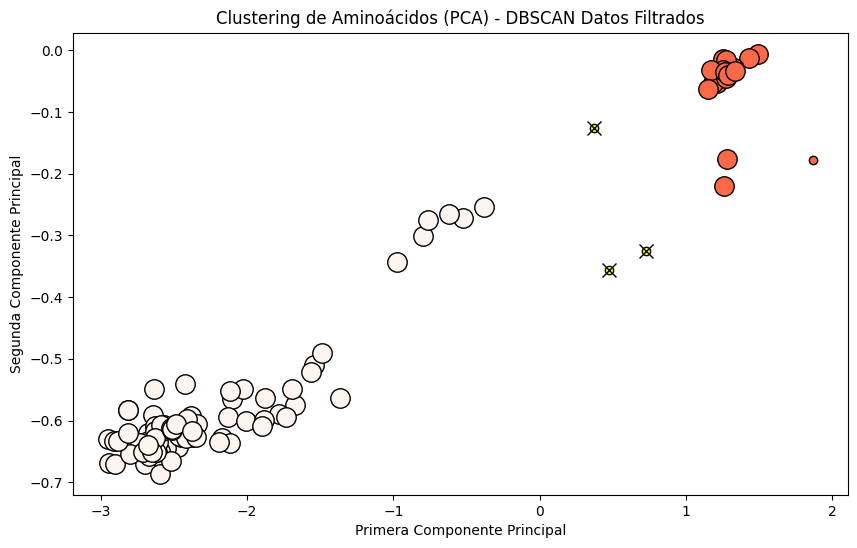


Distribución de Clusters en Datos Filtrados con DBSCAN:
Cluster -1: 3 muestras
Cluster 0: 81 muestras
Cluster 1: 19 muestras

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.92      0.92      0.92        24

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48


Amino acid: [31.432432, 0, 3.603604, 8.108108, 57.657658, 14.414414, 44.144144, 0.900901, 152.252252, 109.009009, 22.522523, 3.603604, 90.09009, 0, 8.108108, 8.108108, 44.144144, 72.972973, 44.144144, 0, 57.657658, 0.900901, 0, 0.900901, 0]
	El aminoácido no es VIH positivo.

Amino acid: [235.739232, 0, 67.054715, 91.268917, 246.332945, 78.696158, 419.091967, 16.763679, 522.5844, 215.250291, 881.140862, 33.643772, 419.091967, 0, 119.208382, 225.378347, 268.218859, 291.036088, 491.85099, 0, 339.464494, 97.90454, 0,

In [14]:
# Importación de librerías necesarias
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA  

# Cargar el conjunto de datos desde un archivo Excel
df = pd.read_excel("C:/Users/monts/OneDrive/Escritorio/UAA/Inteligencia Artificial/VIH/dataset_VIH.xlsx")

# Eliminar la última columna (sumatoria)
df.drop(df.columns[-1], axis=1, inplace=True)

# Seleccionar las características excluyendo la primera (amino ácido) y la última (clasificación)
features = df.columns[1:-1]  

# Preprocesar datos
X = df[features]

# Reemplazar valores nulos con 0 en las características numéricas
X = X.fillna(0)

# Asegurarse de que todas las columnas de X son numéricas
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

# Normalizar los datos para mejorar la distribución
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Aprendizaje no supervisado: Clustering**
# Reducción de dimensionalidad con PCA (2 componentes para visualización)
pca = PCA(n_components=2, random_state=42)
X_pca_scaled = pca.fit_transform(X_scaled)

# Filtrar los datos según los índices especificados
filtered_indices = np.where(
    (X_pca_scaled[:, 0] > -3) & (X_pca_scaled[:, 0] < 3) & 
    (X_pca_scaled[:, 1] > -3) & (X_pca_scaled[:, 1] < 3)
)
filtered_data = X_pca_scaled[filtered_indices]

# Realizar clustering DBSCAN en los datos filtrados
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(filtered_data)

# Obtener las etiquetas de clusters y los core sample indices
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Visualización de clusters con DBSCAN después del filtrado (escala de rojo)
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.Reds(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color para ruido, usando amarillo para mayor visibilidad
        col = [1, 1, 0, 1]

    class_member_mask = (labels == k)
    
    # Puntos centrales
    xy = filtered_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    # Puntos alcanzables
    xy = filtered_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    # Puntos ruidosos
    if k == -1:
        xy = filtered_data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)

plt.title('Clustering de Aminoácidos (PCA) - DBSCAN Datos Filtrados')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

# Análisis de clusters después del filtrado con DBSCAN
print("\nDistribución de Clusters en Datos Filtrados con DBSCAN:")
unique_filtered_dbscan, counts_filtered_dbscan = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_filtered_dbscan, counts_filtered_dbscan):
    print(f"Cluster {cluster}: {count} muestras")

# **Aprendizaje supervisado: Clasificación**
# Convertir etiquetas de clase a binario
def target_value(x):
    if isinstance(x, str):
        return 1 if x.strip() == 'R5X4' else 0
    return 0

# Variable objetivo
y = df['clase'].apply(target_value)

# Aplicar SMOTE para balancear el conjunto de datos
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled
)

# Crear y entrenar un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir métricas de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# **Predicción con el modelo supervisado**
# Preparar nuevos datos de aminoácidos para predicción
new_amino_acids = [
    [31.432432,0,3.603604,8.108108,57.657658,14.414414,44.144144,0.900901,152.252252,109.009009,22.522523,3.603604,90.09009,0,8.108108,8.108108,44.144144,72.972973,44.144144,0,57.657658,0.900901,0,0.900901,0], 
    [235.739232,0,67.054715,91.268917,246.332945,78.696158,419.091967,16.763679,522.5844,215.250291,881.140862,33.643772,419.091967,0,119.208382,225.378347,268.218859,291.036088,491.85099,0,339.464494,97.90454,0,56.344587,0],
    [235.739232,0,67.054715,91.268917,246.332945,78.696158,419.091967,16.763679,522.5844,215.250291,881.140862,33.643772,419.091967,0,119.208382,225.378347,268.218859,291.036088,491.85099,0,339.464494,97.90454,0,56.344587,0],
    [260.802834,0,57.142857,99.291617,283.471074,62.455726,439.31523,17.001181,562.101535,218.299882,793.860685,26.564345,397.16647,0,106.257379,198.465171,283.471074,331.641086,410.979929,0,370.247934,99.291617,0,47.225502,0],
    [32.432432,0,3.603604,8.108108,57.657658,14.414414,44.144144,0.900901,152.252252,109.009009,22.522523,3.603604,90.09009,0,8.108108,8.108108,44.144144,72.972973,44.144144,0,57.657658,0.900901,0,0.900901,0]
]

# Crear un DataFrame con los nuevos aminoácidos
new_amino_acids_df = pd.DataFrame(new_amino_acids, columns=features)

# Escalar los nuevos datos
new_amino_acids_scaled = scaler.transform(new_amino_acids_df)

# Predecir la clasificación de los nuevos aminoácidos
prediction = model.predict(new_amino_acids_scaled)

# Imprimir resultados de las predicciones
for i, a in enumerate(new_amino_acids):
    print(f"\nAmino acid: {a}")
    if prediction[i] == 1:
        print("\tEl aminoácido es VIH positivo.")
    else:
        print("\tEl aminoácido no es VIH positivo.")

# Mostrar la barra de precisión
bar_length = int(accuracy * 50)  # Para hacer la barra más manejable en longitud
bar = '[' + '=' * bar_length + ' ' * (50 - bar_length) + ']'
print(f"\nPrecisión del modelo: {accuracy:.2%}")
print(f"Barra de precisión: {bar}")
